In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:

X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:

single_image= X_train[0]

In [7]:
single_image.shape

(28, 28)

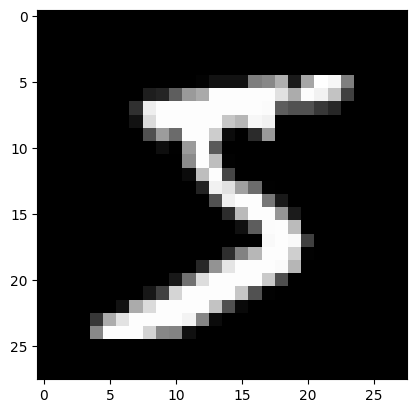

In [8]:
plt.imshow(single_image,cmap='gray')

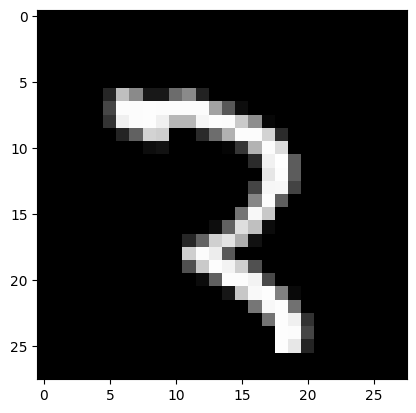

In [9]:
y_train.shape
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_train_scaled.min()
X_train_scaled.max()
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [10]:
model= keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                86544     
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                      

In [12]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [13]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 25s 25ms/step - loss: 0.2909 - accuracy: 0.9129 - val_loss: 0.1037 - val_accuracy: 0.9677
Epoch 2/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0876 - accuracy: 0.9739 - val_loss: 0.0736 - val_accuracy: 0.9760
Epoch 3/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0592 - val_accuracy: 0.9818
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0694 - val_accuracy: 0.9788
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0590 - val_accuracy: 0.9825


In [16]:
metrics = pd.DataFrame(model.history.history)

In [17]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.290928,0.912933,0.103749,0.9677
1,0.087576,0.973933,0.073554,0.9760
2,0.065931,0.980233,0.059220,0.9818
3,0.051782,0.984300,0.069358,0.9788
4,0.042785,0.986517,0.058974,0.9825


<Axes: >

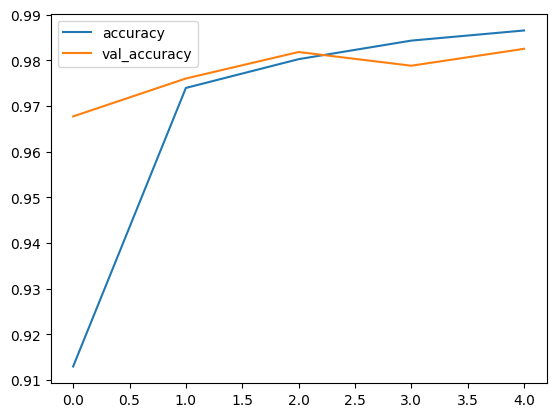

In [18]:

metrics[['accuracy','val_accuracy']].plot()

<Axes: >

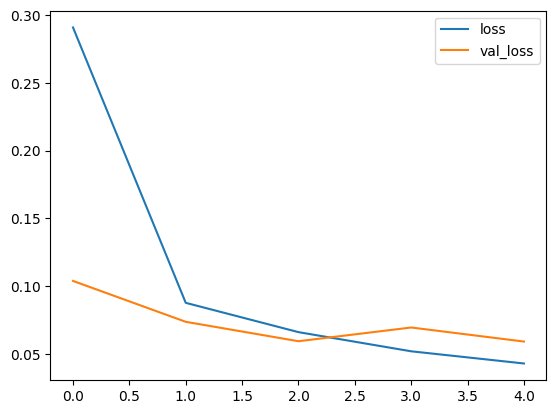

In [19]:

metrics[['loss','val_loss']].plot()

In [20]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 2s 5ms/step
[[ 972    0    2    0    1    2    0    1    1    1]
 [   0 1131    1    2    0    0    0    0    1    0]
 [   2    8  998    3    3    0    0   10    7    1]
 [   0    0    0  995    0    6    0    3    4    2]
 [   2    1    0    0  959    0    0    1    5   14]
 [   0    0    0    5    0  885    2    0    0    0]
 [   7    4    1    1    3    7  926    1    8    0]
 [   0    2    6    1    0    0    0 1015    3    1]
 [   4    0    2    2    0    3    0    2  959    2]
 [   1    3    0    2    3    5    0    6    4  985]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       1.00      0.97  

1/1 [==============================] - 0s 24ms/step
[6]
1/1 [==============================] - 0s 22ms/step
[0]


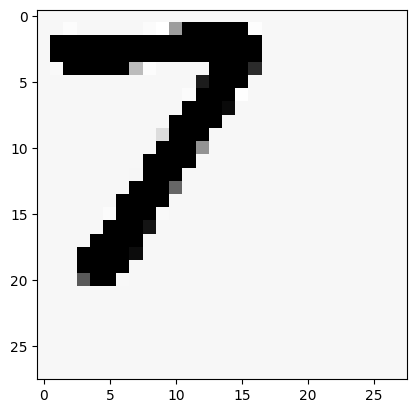

In [21]:
img = image.load_img('sv.png')


type(img)


img = image.load_img('sv.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0



x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


print(x_single_prediction)


plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0



x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


print(x_single_prediction)